<div style="text-align: center">
<h1><font color="black" size=8>REVIEWS</font></h1>

En este dataframe se recogen 1.520.925 reviews **de la página RAWG.io** encontrando las siguientes variables:

1- **`id`**: enumeración ordenada de manera ascendente de cada valoración.

2- **`user_id`**: nombre del usuario que ha realzado la valoración.

3- **`game_id`**: nombre del videojuego que se entra a valorar en la review.

4- **`review_text`**: texto de opinión sobre el videojuego de la review.

5- **`review_rating`**: valoración del videojuego. Los valores que puede tomar puede ser 1 que signfica **Muy malo**, 3 que significa **Decente**, 4 que significa **Bueno** y 5 que significa **Imprescindible**. Como se puede comprobar, no existe valoración 2.

Dicho esto, se procede a su limpieza y análisis previo.

# 1. Carga y análisis previo

In [1]:
# Primero importamos las librerias que vamos a emplear en todo el proyecto

from configparser import ConfigParser
import numpy as np
import pandas as pd
import glob
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import boto3

In [18]:
config = ConfigParser()
config.read('secrets.toml', encoding='utf-8')

BUCKET_S3 = config['AWS']['bucket_s3']
FOLDER = 'reviews/'

NEW_FILE_NAME = 'clean_dataset/games_clean.feather'

In [19]:
games_df = pd.read_feather(f'{BUCKET_S3}/{NEW_FILE_NAME}')

In [21]:
# %%
# Se realiza la conexion con S3
bucket = (
    boto3.resource('s3', region_name='us-east-1')
    .Bucket(name=BUCKET_S3[5:])
    )


In [22]:
# Se leen las reviews disponibles

av_files = [
    obj.key for obj in bucket.objects.filter(Prefix=FOLDER)
    if len(obj.key) > len(FOLDER)
    ]

reviews_list = []
for file in av_files:
    reviews_list.append(
        pd.read_feather(f'{BUCKET_S3}/{file}')
    print(file)

reviews_df = pd.concat(reviews_list)
print('Reviews cargadas')

reviews/reviews_0000001_0050000.feather
reviews/reviews_0050001_0100000.feather
reviews/reviews_0100001_0150000.feather
reviews/reviews_0150001_0200000.feather
reviews/reviews_0200001_0250000.feather
reviews/reviews_0250001_0300000.feather
reviews/reviews_0300001_0350000.feather
reviews/reviews_0350001_0400000.feather
reviews/reviews_0400001_0450000.feather
reviews/reviews_0450001_0500000.feather
reviews/reviews_0500001_0550000.feather
reviews/reviews_0550001_0600000.feather
reviews/reviews_0600001_0650000.feather
reviews/reviews_0650001_0700000.feather
reviews/reviews_0700001_0750000.feather
reviews/reviews_0750001_0800000.feather
reviews/reviews_0800001_0850000.feather
reviews/reviews_0850001_0900000.feather
reviews/reviews_0900001_0950000.feather
reviews/reviews_0950001_1000000.feather
reviews/reviews_1000001_1050000.feather
reviews/reviews_1050001_1100000.feather
reviews/reviews_1100001_1150000.feather
reviews/reviews_1150001_1200000.feather
reviews/reviews_1200001_1250000.feather


In [115]:
reviews_df

,id,user_id,game_id,review_text,review_rating
0,1650001,max-antihero,zombie-army-dead-war-4,,4
1,1650002,max-antihero,ashen,,3
2,1650003,max-antihero,absolver,,1
3,1650004,txapito,the-council,,4
4,1650005,jackalopedoc,planet-coaster,,4
...,...,...,...,...,...
14741,1665213,keeper,the-last-of-us-left-behind,,4
14742,1665214,billyosmond,fidel-dungeon-rescue,,1
14743,1665215,bryguygames,rainbow-moon,,5
14744,1665216,pazuzu_petals,loop-hero,,4


Se convierte los espacios en blanco en valores nulos.

In [116]:
reviews_df = reviews_df.replace([''], np.NaN)

Se comprueba cuando espacios en blanco / valores nulos existen.

In [118]:
reviews_df.isna().mean()*100

id                0.000000
user_id           0.000000
game_id           0.000000
review_text      99.193001
review_rating     0.000000
dtype: float64

In [119]:
# A modo de ejemplo, mostramos 60 comentarios de reviews junto con sus respectivas valoraciones

reviews_with_text2= reviews_df.dropna()
reviews_with_text2[['review_text', 'review_rating']].head(60)

,review_text,review_rating
142,"Chill game, nice to relax too but wish it was ...",4
179,It’s leaving in two weeks so I’m giving it a g...,1
183,"A neat, scifi adventure with a lot of choice. ...",4
187,Very happy I gave this game a shot before it l...,3
209,Masterpiece,5
718,"прошел игру ершиком, оружие топ",4
778,Recommended,4
782,"Многие отечественные игроки, считающие себя по...",5
1371,hi,5
1681,I just can't have fun in a game with such cran...,3


De todas las reviews recogidas, **más del 99%** vienen si comentario alguno. Se procede a eliminar esta fila por dos motivos:

- No aporta ninguna información adicional pues los comentarios positivos y negativos **irán acompañados de su respectiva valoración** (se puede apreciar como dos reviews son comentadas con "Gud!" y "Wow." son valoradas con la máxima puntuación).

- Algunos **tampoco ofrecen realmente una valoración verídica** pues o son números o palabras sueltas sin ningún contexto en los que nos interesa en este proyecto.

In [14]:
reviews_df = videogames_reviews.drop(["review_text"], axis = 1)

# 2. Limpieza del dataset

Se definen los **constantes**.

In [23]:
N_REVIEWS = 50000

Con ello, se va a **crear una función** con la que limpiará este dataset. Se irá explicando en la propia pipeline a medida que se vaya avanzando.

In [9]:
def r_cleaner(games_df, reviews_df):
    '''
    Se define la funcion utilizada para limpiar las reviews y los juegos
    existentes
    '''

    reviews_df['id'] = reviews_df['id'].astype(int)
    reviews_df['review_rating'] = reviews_df['review_rating'].astype(int)

    # Se agrupan los usuarios segun la media de sus valoraciones, las reviews
    # totales y el numero de reviews con cada nota distinta
    # Permaneceran los usuarios con 5 o mas reviews y que tengan, como minimo,
    # una valoracion con cada valor (1, 3, 4, 5) para evitar usuarios con solo
    # reviews positivas o negativas

    print('Se obtienen los usuarios validos')
    users_df = (
        reviews_df
        .groupby('user_id', as_index=False)
        ['review_rating']
        .agg({
            'count': 'count',
            '1': lambda x: (x == 1).sum(),
            '3': lambda x: (x == 3).sum(),
            '4': lambda x: (x == 4).sum(),
            '5': lambda x: (x == 5).sum()
            })
        .loc[lambda df: df['count'] > 4]
        )

    for num in [str(n) for n in range(1, 6) if n != 2]:
        users_df = users_df.loc[users_df[num] > 0]

    # Se limpian las reviews permaneciendo las de usuarios validos
    reviews_df = reviews_df.merge(users_df[['user_id']], on='user_id')

    # Se eliminan las reviews de juegos que no esten disponibles en el dataset
    print('Se limpian las reviews de juegos inexistentes')
    reviews_df = (
        reviews_df
        .merge(
            games_df[['RAWG_link']],
            left_on='game_id',
            right_on='RAWG_link'
            )
        .drop('RAWG_link', axis=1)
        .sort_values('id')
        .reset_index(drop=True)
        )

    # Se realiza la misma limpieza, pero con los juegos con review
    print('Se limpian los juegos sin un minimo de reviews validas')
    games_reviews_df = (
        reviews_df
        .groupby('game_id', as_index=False)
        ['review_rating']
        .agg({
            'RAWG_rating': 'mean',
            'RAWG_nreviews': 'count'
            })
        .loc[lambda df: df['RAWG_nreviews'] > 5]
        .assign(RAWG_rating=lambda df: df['RAWG_rating'].round(2))
        )

    # Se limpia el dataset usando los juegos con varias reviews
    reviews_df = (
        reviews_df
        .merge(games_reviews_df[['game_id']], on='game_id')
        .sort_values('id')
        )

    # Para limpiar games_df, se usan los valores limpios de games_reviews_df
    games_reviews_df = (
        games_reviews_df
        .merge(reviews_df[['game_id']], on='game_id')
        .drop_duplicates('game_id')
        )

    # Se obtienen los nuevos datos de RAWG_rating y RAWG_nreviews
    print('Se obtiene el dataset limpio')
    games_df = (
        games_df.drop(['RAWG_rating', 'RAWG_nreviews'], axis=1)
        .merge(
            games_reviews_df, left_on='RAWG_link', right_on='game_id'
            )
        .drop('game_id', axis=1)
        .drop_duplicates(subset='RAWG_link')
        .reset_index(drop=True)
        )

    cols = games_df.columns.tolist()
    games_df = games_df[cols[:10] + cols[-2:] + cols[10:-2]]

    # Se exportan las reviews
    print('Se obtienen las reviews limpias')
    clean_reviews = dict()
    for top_name in list(range(
            N_REVIEWS,
            int(ceil(reviews_df['id'].max()/N_REVIEWS)*N_REVIEWS)+1,
            N_REVIEWS
            )):
        low_name = top_name - (N_REVIEWS-1)
        mini_reviews_df = (
            reviews_df.loc[
                (reviews_df['id'] >= low_name) & (reviews_df['id'] <= top_name)
                ]
            .reset_index(drop=True)
            )
        clean_reviews[
            f'reviews_clean_{low_name:07d}_{top_name:07d}.feather'
            ] = mini_reviews_df

    # Se devuelven los DataFrames de reviews y el dataset de juegos limpio
    return games_df, clean_reviews

In [24]:
clean_games_df, clean_reviews_df = r_cleaner(games_df, reviews_df)

Se obtienen los usuarios validos
Se limpian las reviews de juegos inexistentes
Se limpian los juegos sin un minimo de reviews validas
Se obtiene el dataset limpio
Se obtienen las reviews limpias


# 3. Gráfico

El único **gráfico** con información es el de la distribución de las valoraciones para observar que puntuaciones destacan más.

Text(0, 0.5, 'Nº de reviews')

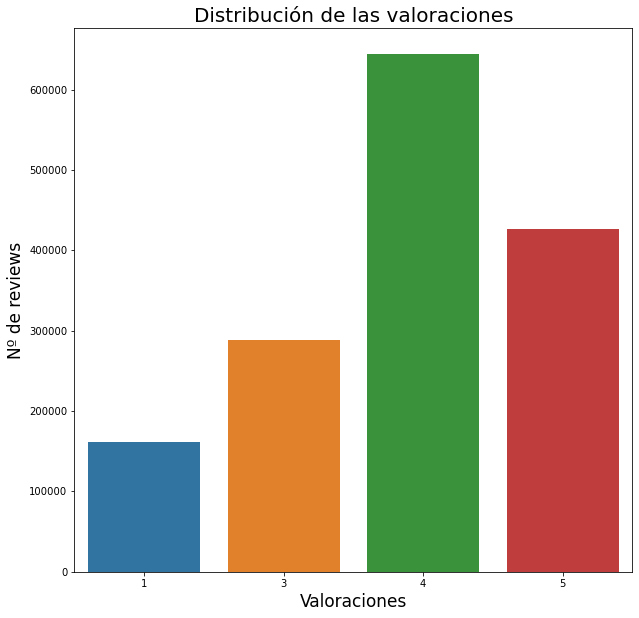

In [26]:
# Creamos el countplot

plt.subplots(figsize = (10,10))
sns.countplot(x= reviews_df['review_rating'])
plt.title('Distribución de las valoraciones', size = 20)
plt.xlabel('Valoraciones', size = 17)
plt.ylabel('Nº de reviews', size = 17)

Partiendo de que no existe el 2, la valoraciones tienden a ser más positivas que negativas pues la suma del `4` y `5` superar a la de `1` y `3`.